# PSO dynamical equations
* velocity update
$$
    v_j^{(i)}[k+1] = w * v_j^{(i)}[k] + c_1 * r_1,j * (p_j^{(i)}[k] - x_j^{(i)}[k]) + c_2 * r_2,j * (g_j^{(i)}[k] - x_j^{(i)}[k])
$$

* position update
$$
    x_j^{(i)}[k+1] = x_j^{(i)}[k] + v_j^{(i)}[k+1]
$$

* $\bar{x}^{(i)}[k]$: Position of $i$th particle in $k$th iteration

$$
    \bar{x}^{(i)}[k] = (x_0^{(i)}[k], x_1^{(i)}[k], ..., x_D^{(i)}[k])
$$

* $\bar{v}^{(i)}[k]$: velocity of $i$th particle in $k$th iteration

$$
    \bar{v}^{(i)}[k] = (v_0^{(i)}[k], v_1^{(i)}[k], ..., v_D^{(i)}[k])
$$

In [1]:
using Plots
using LaTeXStrings

In [2]:
include("pso.jl")

updateSwarm

In [3]:
function onePsoRun(fitFunc::Function, nDim::Int; nParticle=100, nInter::Int=4000)
    s = Swarm(fitFunc, nDim, nParticle=nParticle, nInter=nInter)
    initSwarm(s)
    
    for i in s.nInter
        updateSwarm(s)
    end
    s.gBest
end

fitFunc(x) = (x[1]-1/2)^2 + (x[2]-1/2)^2
nDim = 2

nParticle = 100
nInter = 4000
nRun = 200
xs = Array{Float}(undef, nRun)
ys = zeros(nRun)
for i in 1:nRun
    xs[i], ys[i] = onePsoRun(fitFunc, nDim, nParticle=nParticle, nInter=nInter)
end

In [ ]:
gr()
scatter(xs, ys, markersize=2, c=:blue, xlims = (0.2,0.8), ylims = (0.2,0.8), 
label = L"f(x,y) = (x-0.5)^2 + (y-0.5)^2",
title = "$nParticle particles, $nInter iterations, $nRun PSO runs")
xlabel!("x")
ylabel!("y")


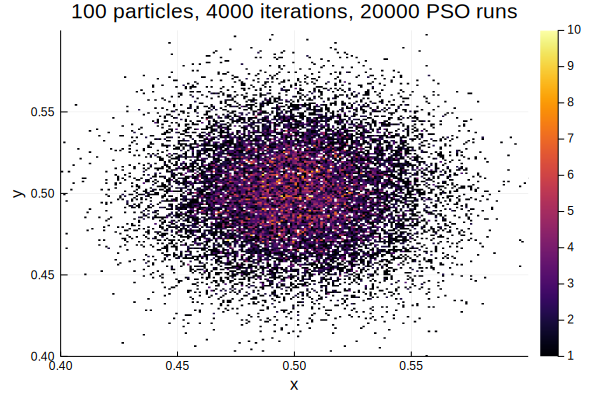

In [14]:
histogram2d(xs, ys,nbins=300, xlims = (0.4,0.6), ylims = (0.4,0.6), 
label = L"f(x,y) = (x-0.5)^2 + (y-0.5)^2",
title = "$nParticle particles, $nInter iterations, $nRun PSO runs")
xlabel!("x")
ylabel!("y")
